In [1]:
#INITIALIZATION
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection

#models
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

#testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

reg_data = pd.read_csv('/Users/asamc/Documents/BMEN415/regression.csv')
#reg_data

# Split the dataset into predictor variables (X) and response variable (y)
X = reg_data.iloc[:, :-1] #means until the last column  
y = reg_data.iloc[:, -1] #means the last column - what we want to predict - only

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

R^2 Training is: 0.6767694473898334
R^2 Testing is: 0.484845541822591

The Training Root Mean Squared Error is: 0.7830184923884569
The Testing Root Mean Squared Error is: 0.8881024174138309


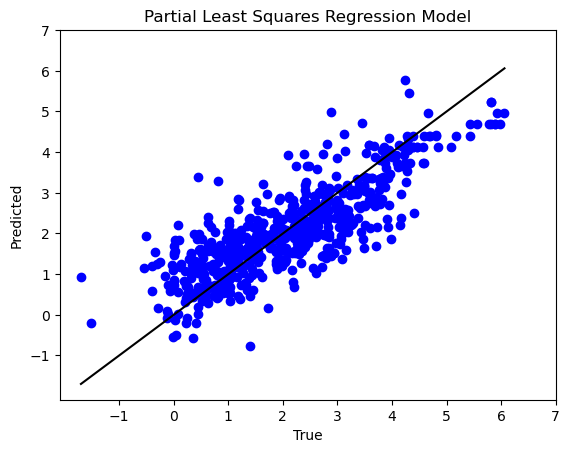

In [2]:
#PARTIAL LEAST SQUARES
pls = PLSRegression(n_components=2)
pls.fit(X_train, y_train)

y_pred_test = pls.predict(X_test)
y_pred_train = pls.predict(X_train)

#R^2 Accuracy
r2_train = r2_score(y_train, y_pred_train)
print("R^2 Training is:", r2_train)
r2_test = r2_score(y_test, y_pred_test)
print("R^2 Testing is:", r2_test)

print()

#RMSE
rmse_train = math.sqrt(mean_squared_error(y_train, y_pred_train))
print('The Training Root Mean Squared Error is:', rmse_train)
rmse_test = math.sqrt(mean_squared_error(y_test, y_pred_test))
print('The Testing Root Mean Squared Error is:', rmse_test)

#Plotting
plt.scatter(y_train, y_pred_train, color="blue")

p1 = max(max(y_pred_train),max(y_train))
p2 = min(min(y_pred_train),min(y_train))
plt.plot([p1,p2],[p1,p2],color="black")

#Formatting
plt.xticks((range(-1,8)))
plt.yticks((range(-1,8)))

plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Partial Least Squares Regression Model')

plt.show()

R^2 Training is: 0.701986322001294
R^2 Testing is: 0.45605761432182257

The Training Mean Squared Error is: 0.7518546935143943
The Testing Mean Squared Error is: 0.9125796326501971


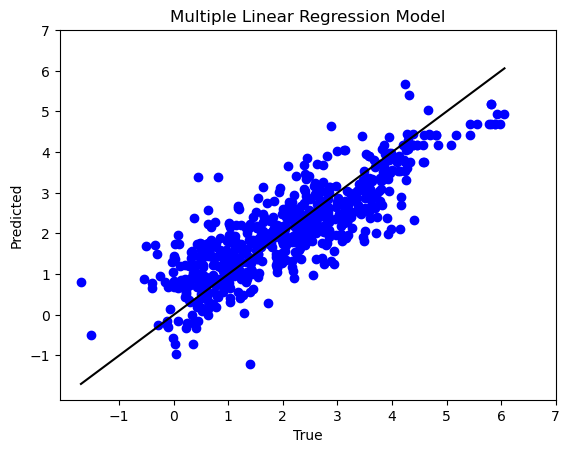

In [3]:
#MULTIPLE LINEAR REGRESSION
mlr = LinearRegression() 
mlr.fit(X_train, y_train)

y_pred_test = mlr.predict(X_test)
y_pred_train = mlr.predict(X_train)

#R^2 Accuracy
r2_train = r2_score(y_train, y_pred_train)
print("R^2 Training is:", r2_train)
r2_test = r2_score(y_test, y_pred_test)
print("R^2 Testing is:", r2_test)

print()

#RMSE
rmse_train = math.sqrt(mean_squared_error(y_train, y_pred_train))
print('The Training Mean Squared Error is:', rmse_train)
rmse_test = math.sqrt(mean_squared_error(y_test, y_pred_test))
print('The Testing Mean Squared Error is:', rmse_test)

#Plotting
plt.scatter(y_train, y_pred_train, color="blue")

p1 = max(max(y_pred_train),max(y_train))
p2 = min(min(y_pred_train),min(y_train))

plt.plot([p1,p2],[p1,p2],color="black")

#Formatting
plt.xticks((range(-1,8)))
plt.yticks((range(-1,8)))

plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Multiple Linear Regression Model')

plt.show()

R^2 Training is: 0.9627891901854179
R^2 Testing is: 0.5334159266051735

The Training Mean Squared Error is: 0.26567480915583186
The Testing Mean Squared Error is: 0.845199586803434


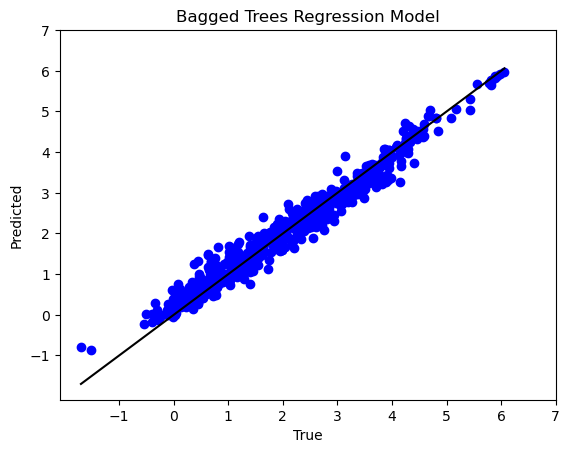

In [4]:
#BAGGED TREES
btree = BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                          n_estimators=250, random_state=0)
#both n_estimators and random_state are arbitrary? I am assuming? Out of the ones I tried, there values offered the lowest error. 
btree.fit(X_train, y_train)

y_pred_test = btree.predict(X_test)
y_pred_train = btree.predict(X_train)

#R2
r2_train = r2_score(y_train, y_pred_train)
print("R^2 Training is:", r2_train)
r2_test = r2_score(y_test, y_pred_test)
print("R^2 Testing is:", r2_test)

print()

#RMSE
rmse_train = math.sqrt(mean_squared_error(y_train, y_pred_train))
print('The Training Mean Squared Error is:', rmse_train)
rmse_test = math.sqrt(mean_squared_error(y_test, y_pred_test))
print('The Testing Mean Squared Error is:', rmse_test)

#Plotting
plt.scatter(y_train, y_pred_train, color="blue")

p1 = max(max(y_pred_train),max(y_train))
p2 = min(min(y_pred_train),min(y_train))

plt.plot([p1,p2],[p1,p2],color="black")

#Formatting
plt.xticks((range(-1,8)))
plt.yticks((range(-1,8)))

plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Bagged Trees Regression Model')

plt.show()